In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# <font size="6">1. Khai báo tên file</font>

In [6]:
commits_file_name = r'D:\projects\Python\BTL\raw_data\100_commits_per_month_since_2021_data.json'
detail_commits_file_name = r'D:\projects\Python\BTL\raw_data\100_detail_commits_per_month_since_2021_data.json'
commits_since_June_2023_file_name = r'D:\projects\Python\BTL\raw_data\commits_since_June_2023_data.json'

# <font size="6">2. Mở dữ liệu và làm sạch</font>

<font size="4">2.1. Mở dữ liệu 100 commmit mỗi tháng từ năm 2021 và thêm dữ liệu file thay đổi</font>

In [7]:
# Mở dữ liệu 100 commit mỗi tháng từ năm 2021
with open(detail_commits_file_name, 'r', encoding='utf-8') as file:
    detail_commits_data = json.load(file)
detail_df = pd.json_normalize(detail_commits_data)
detail_df['stats.changes'] = detail_df['stats.total'] - detail_df['stats.additions'] - detail_df['stats.deletions']

# Thêm cột changed_files
changes_files = pd.DataFrame(columns = ['num_of_changed_files','changed_files'])
for i in range(len(detail_df)):
    string_file = []
    for j in range(len(detail_df.loc[i]['files'])):
        string_file.append(detail_df.loc[i]['files'][j]['filename'])
    new_row = pd.DataFrame({'num_of_changed_files' : len(string_file),'changed_files': [string_file]})
    changes_files = pd.concat([changes_files, new_row], ignore_index=True)
detail_df = pd.concat([detail_df, changes_files], axis = 1)

detail_df = detail_df[['sha', 'commit.author.name', 'commit.author.email', 'commit.author.date', 'commit.message',
                        'stats.additions', 'stats.deletions', 'stats.changes', 'stats.total', 'num_of_changed_files','changed_files']]

In [8]:
# Lưu dataframe thành file excel
detail_df.to_excel(r'D:\projects\Python\BTL\cleaned_data\cleaned_100_commit_per_month_data.xlsx')

<font size="4">2.2. Mở dữ liệu commit từ tháng 6 năm 2023 đến nay</font>

In [9]:
# Mở dữ liệu commit từ tháng 6 năm 2023 đến nay
with open(commits_since_June_2023_file_name, 'r', encoding='utf-8') as file:
    commits_since_June_2023_data = json.load(file)
df_since_June_2023 = pd.json_normalize(commits_since_June_2023_data)

# <font size="6">3. Phân tích commit</font>

<font size="4">3.1. Số lượng người commit từ năm 2021</font>

In [10]:
people_have_commited = list({x for x in detail_df['commit.author.name']})
num_of_people_have_commited = len(people_have_commited)
num_of_people_have_commited

658

<font size="4">3.2. Những người có nhiều commit nhất</font>

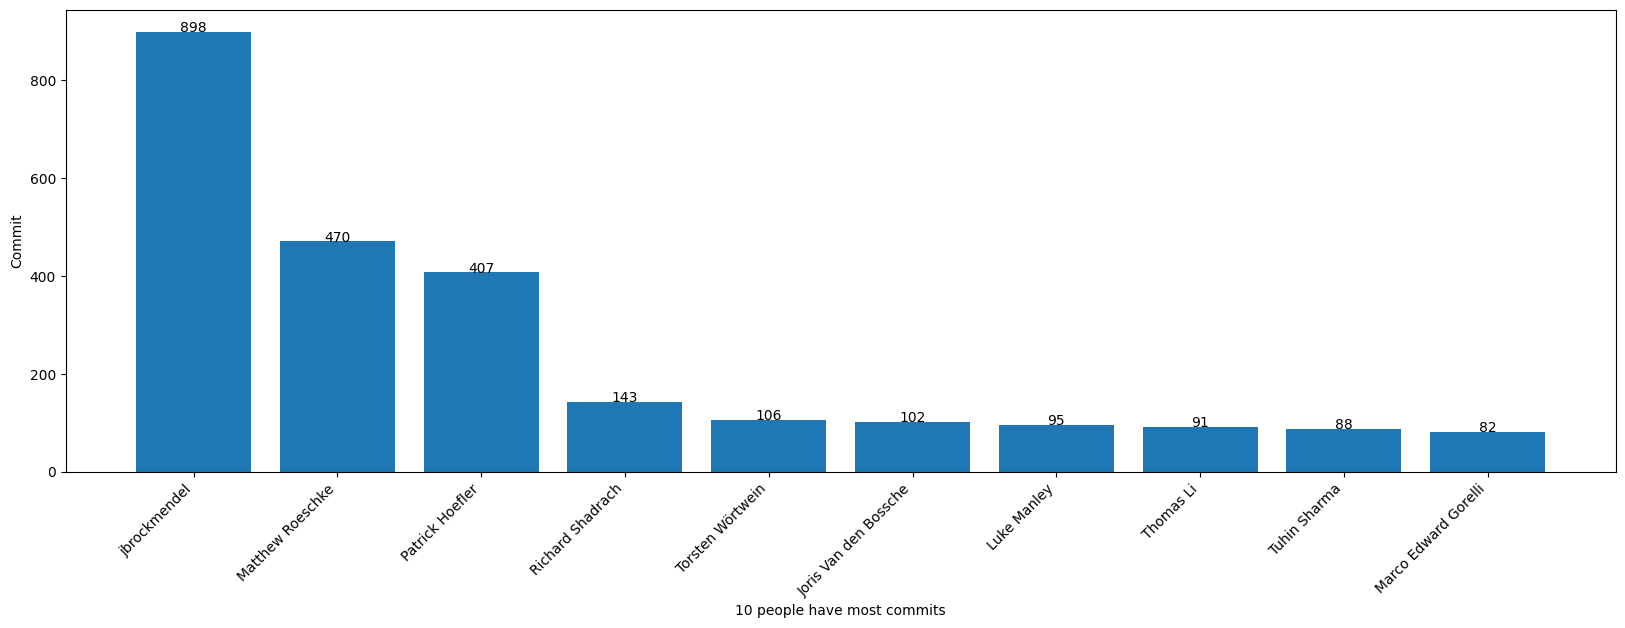

In [11]:
num_of_people = 10
people_have_most_commits = detail_df['commit.author.name'].value_counts().head(num_of_people)

name = people_have_most_commits.index
value = people_have_most_commits.values

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(num_of_people):
    plt.text(i, value[i] + 0.1, value[i], ha = 'center')
plt.ylabel('Commit')
plt.xlabel(f'{num_of_people} people have most commits')
plt.show()

<font size="4">3.3. Những người có nhiều commit nhất theo %</font>

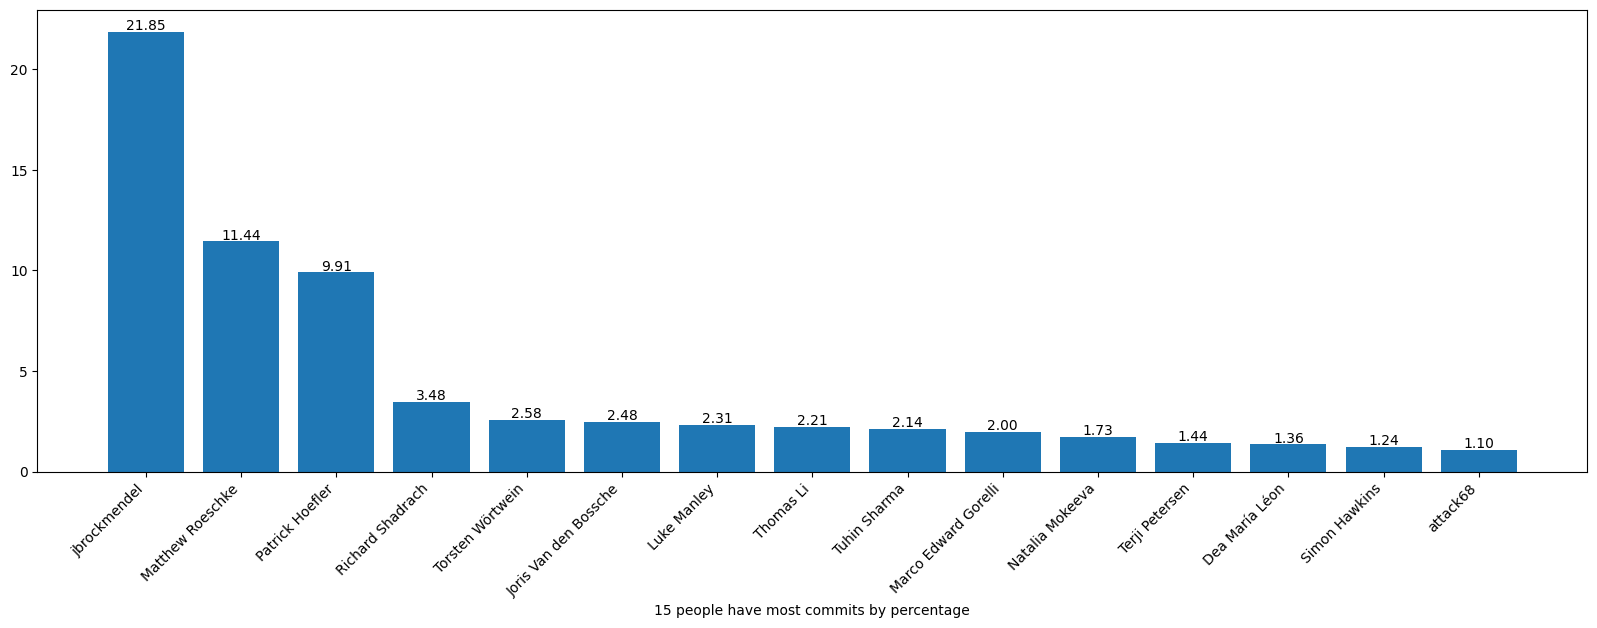

In [12]:
num_of_people = 15
people_have_most_commits_by_percentage = detail_df['commit.author.name'].value_counts().head(num_of_people)

name = people_have_most_commits_by_percentage.index
value_by_percentage = people_have_most_commits_by_percentage.values / len(detail_df) * 100

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(name, value_by_percentage)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(num_of_people):
    plt.text(i, value_by_percentage[i] + 0.1, f"{value_by_percentage[i]:.2f}", ha = 'center')
plt.xlabel(f'{num_of_people} people have most commits by percentage')
plt.show()

<font size="4">3.4. Những người commit gần đây nhất</font>

In [13]:
The_five_most_recent_commits = detail_df['commit.author.name'].head()
The_five_most_recent_commits

0         jbrockmendel
1    Waltteri Koskinen
2       gunjan-solanki
3       Nofar Mishraki
4           Irv Lustig
Name: commit.author.name, dtype: object

<font size="4">3.5. Những người commit trong 1 ngày cụ thể</font>

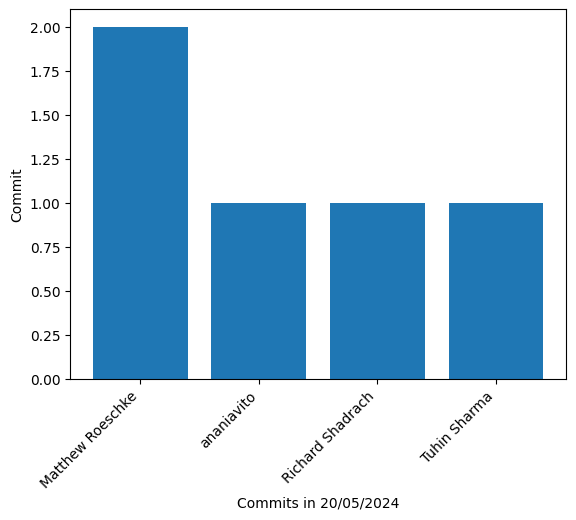

In [14]:
date = '20/05/2024'
date_search = datetime.strftime(datetime.strptime(date, '%d/%m/%Y'), '%Y-%m-%d')

mask = detail_df['commit.author.date'].str.contains(date_search)

commit_in_a_particular_day = detail_df[mask]['commit.author.name'].value_counts()

name = commit_in_a_particular_day.index
value = commit_in_a_particular_day.values

fig, ax = plt.subplots()
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
plt.ylabel('Commit')
plt.xlabel(f'Commits in {date}')
plt.show()

<font size="4">3.6. Những người commit từ 1 ngày cụ thể này đến 1 ngày cụ thể khác</font>

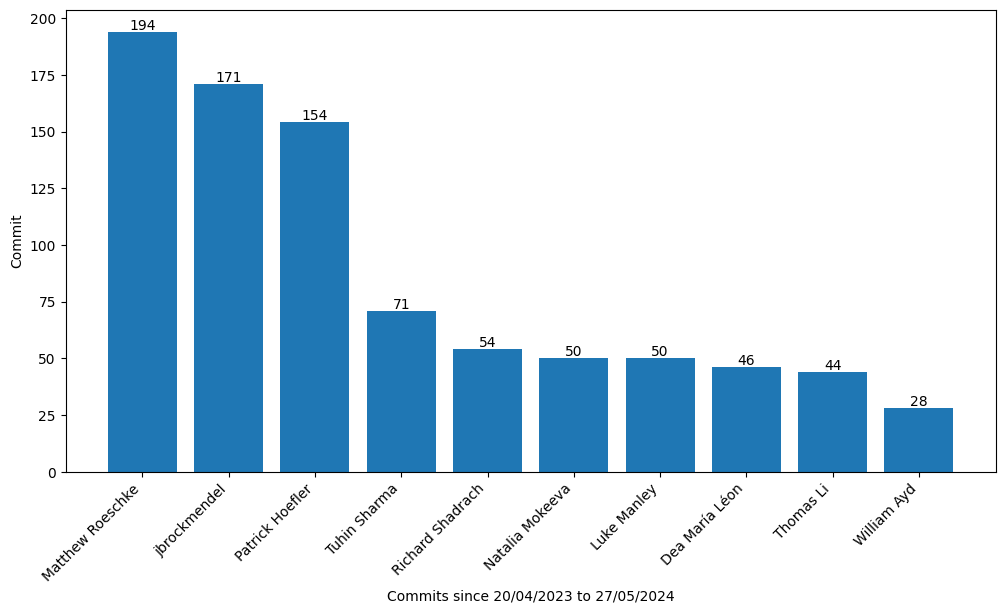

In [15]:
date1 = '20/04/2023'
date2 = '27/05/2024'
date_search1 = datetime.strptime(date1, '%d/%m/%Y')
date_search2 = datetime.strptime(date2, '%d/%m/%Y')
delta = timedelta(days = 1)

days = []
while date_search1 <= date_search2:
    tmp_day = datetime.strftime(date_search1, '%Y-%m-%d')
    days.append(tmp_day)
    date_search1 += delta
    
regex_pattern = '|'.join(days)
mask = detail_df['commit.author.date'].str.contains(regex_pattern)
num_of_contributors = 10
commit_in_a_particular_day = detail_df[mask]['commit.author.name'].value_counts().head(num_of_contributors)


name = commit_in_a_particular_day.index
value = commit_in_a_particular_day.values

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(num_of_contributors):
    plt.text(i, value[i] + 1, value[i], ha = 'center')
plt.ylabel('Commit')
plt.xlabel(f'Commits since {date1} to {date2}')
plt.show()

<font size="4">3.7. Độ dài message dài nhất</font>

In [16]:
df_sort_by_length_of_message = detail_df.sort_values(by = ['commit.message'], key=lambda x: x.str.len(), ascending = False)
pd.set_option('display.max_colwidth', None)

longest_message = df_sort_by_length_of_message.iloc[0]['commit.message']
len(longest_message)

6356

<font size="4">3.8. Những người có message dài nhất</font>

In [17]:
len_of_commit = [x for x in df_sort_by_length_of_message['commit.message'].str.len()]
tmp = df_sort_by_length_of_message[['commit.author.name', 'commit.author.date']]
tmp.insert(2, 'len of commit', len_of_commit)
tmp.head()

,commit.author.name,commit.author.date,len of commit
2035,Patrick Hoefler,2022-09-26T22:58:09Z,6356
3226,Natalia Mokeeva,2023-09-20T17:00:35Z,6256
3948,Carlo Barth,2024-04-24T19:41:58Z,3172
602,Leonardo Freua,2021-07-31T06:38:46Z,2858
4002,jbrockmendel,2024-05-31T18:40:04Z,2617


<font size="4">3.9. Cụm từ xuất hiện nhiều nhất trong các message</font>

In [18]:
words = [x.split()[0] for x in detail_df['commit.message']]
words_with_no_duplication = pd.DataFrame(list({x:words.count(x)for x in words}.items()), columns = ['Words', 'Time'] )
words_with_no_duplication.sort_values(by = 'Time', ascending = False, inplace = True, ignore_index = True)
words_with_no_duplication.head()

,Words,Time
0,DOC:,598
1,BUG:,579
2,REF:,301
3,TST:,289
4,ENH:,219


<font size="4">3.10. Số lượng commit mỗi tháng từ tháng 6/2023 đến 6/2024</font>

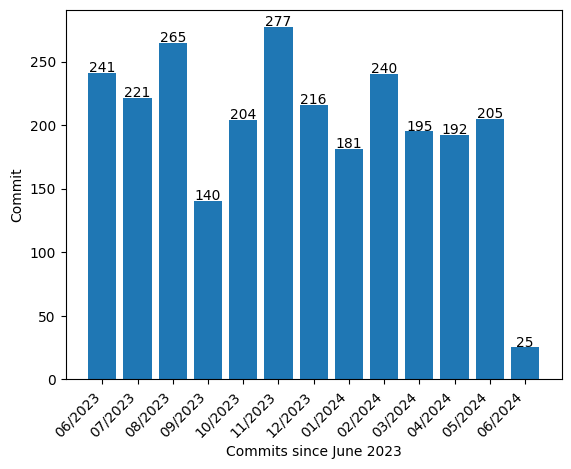

In [19]:
months = []
for year in range(2023, 2025):
    for month in range(1, 13):
        if year == 2023 and month < 6:
            continue
        if year == 2024 and month > 6:
            break
        months.append(f"{month:02d}/{year}")
        
month_series = pd.Series(index = months)
for month in months:
    month_search = datetime.strftime(datetime.strptime(month, '%m/%Y'), '%Y-%m')
    month_mask = df_since_June_2023['commit.author.date'].str.contains(month_search)
    month_series[month] = len(df_since_June_2023[month_mask])    

name = month_series.index
value = month_series.values

fig, ax = plt.subplots()
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(len(months)):
    plt.text(i, value[i] + 1, int(value[i]), ha = 'center')
plt.ylabel('Commit')
plt.xlabel('Commits since June 2023')
plt.show()

<font size="4">3.11. Thời gian hoạt động của một contributor từ năm 2021</font>

In [20]:
def get_commit_date_of_specific_person(name):
    contributor_name = name
    name_mask = detail_df['commit.author.name'] == contributor_name
    commits_by_a_specific_person = pd.DataFrame(detail_df[name_mask])
    commits_by_a_specific_person.reset_index(drop = True, inplace = True)
    return commits_by_a_specific_person['commit.author.date']
contributor_name = 'Patrick Hoefler'
commits_by_a_specific_person = get_commit_date_of_specific_person(contributor_name)
commits_by_a_specific_person

0      2021-04-26T12:57:26Z
1      2021-04-26T12:53:54Z
2      2021-04-26T12:03:03Z
3      2021-04-22T01:06:47Z
4      2021-05-27T10:20:58Z
               ...         
402    2024-03-25T17:41:00Z
403    2024-03-24T00:41:10Z
404    2024-03-18T16:47:46Z
405    2024-04-30T20:02:25Z
406    2024-04-29T22:16:41Z
Name: commit.author.date, Length: 407, dtype: object

<font size="4">3.12. Commit mỗi tháng của một contributor</font>

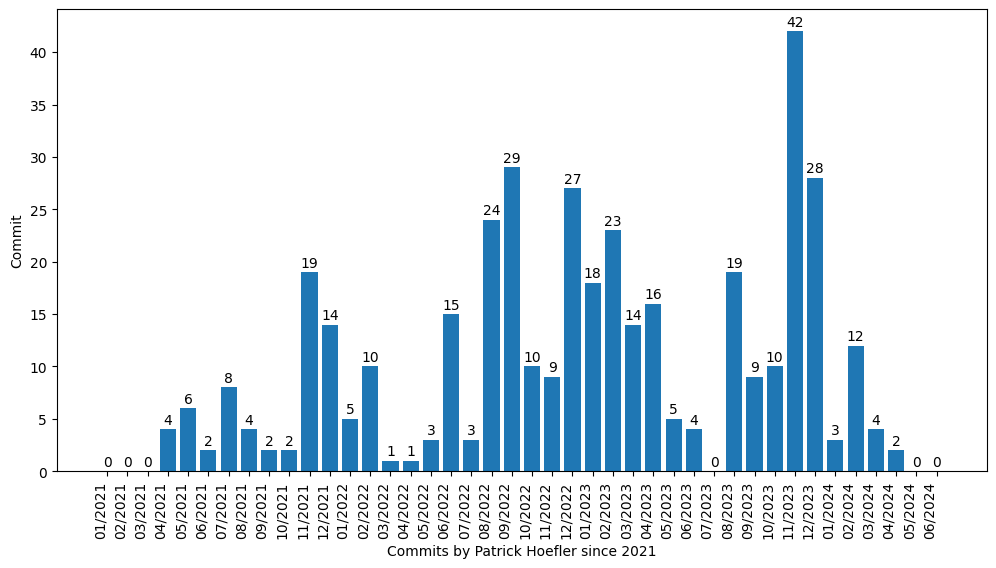

In [21]:
# Commit mỗi tháng của 1 contributor
months = []
for year in range(2021, 2025):
    for month in range(1, 13):
        if year == 2024 and month > 6:
            break
        months.append(f"{month:02d}/{year}")
        
month_series = pd.Series(index = months)
for month in months:
    month_search = datetime.strftime(datetime.strptime(month, '%m/%Y'), '%Y-%m')
    month_mask = commits_by_a_specific_person.str.contains(month_search)
    month_series[month] = len(commits_by_a_specific_person[month_mask])    

name = month_series.index
value = month_series.values
x = np.arange(len(months))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar( name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 90, ha = 'right')
for i in range(len(months)):
    plt.text(i, int(value[i]) + 0.5, int(value[i]), ha = 'center')
plt.ylabel('Commit')
plt.xlabel(f'Commits by {contributor_name} since 2021')
plt.show()

<font size="4">3.13. Contributor có thời gian hoạt động lâu nhất</font>

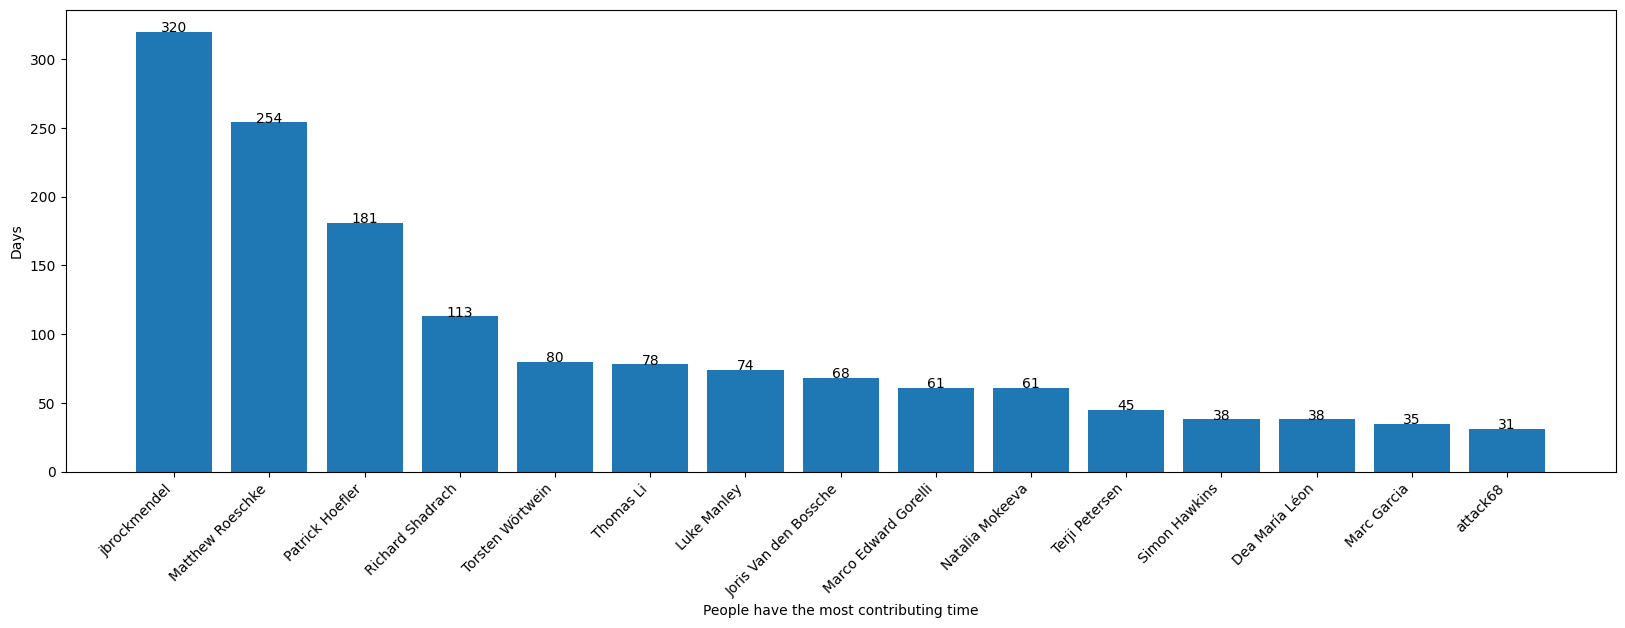

In [22]:
consitent = []
contributing_time = []
contributors_name = list(set(detail_df['commit.author.name'].tolist()))
for name in contributors_name:
    tmp_df = get_commit_date_of_specific_person(name)
    days = []
    count = 0
    for day in tmp_df:
        tmp_day = datetime.strftime(datetime.strptime(day, '%Y-%m-%dT%H:%M:%SZ'), '%d/%m/%Y')
        if tmp_day not in days:
            days.append(tmp_day)
            count += 1
    start_day = datetime.strptime(min(tmp_df), '%Y-%m-%dT%H:%M:%SZ')
    end_day = datetime.now()
    time_delta = (end_day - start_day).days
    contributing_time.append(count)
    consitent.append(round((count/(time_delta + 1)) * 100, 2))
contributing_time_df = pd.Series(contributing_time, index = contributors_name)
contributing_time_df.sort_values(ascending = False, inplace = True)

num_of_contributor = 15

name = contributing_time_df.head(num_of_contributor).index
value = contributing_time_df.head(num_of_contributor).values

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(num_of_contributor):
    plt.text(i, value[i], value[i], ha = 'center')
plt.ylabel('Days')
plt.xlabel('People have the most contributing time')
plt.show()

<font size="4">3.14. Contributor có % thời gian đóng góp nhiều nhất</font>

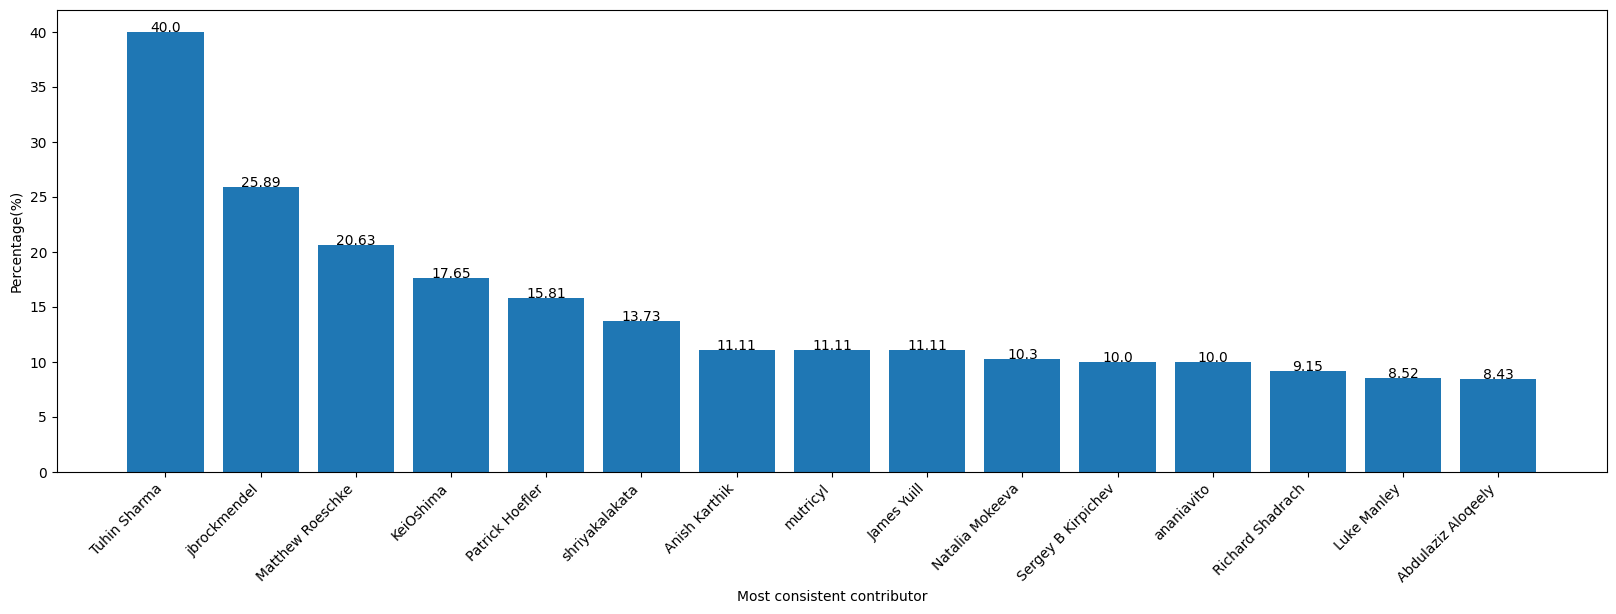

In [23]:
consitent_df = pd.Series(consitent , index = contributors_name)
consitent_df.sort_values(ascending = False, inplace = True)
name = consitent_df.head(num_of_contributor).index
value1 = consitent_df.head(num_of_contributor).values

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(name, value1)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(num_of_contributor):
    plt.text(i, value1[i], value1[i], ha = 'center')
plt.ylabel('Percentage(%)')
plt.xlabel('Most consistent contributor')
plt.show()